In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [38]:
reviews = pd.read_csv("D:/Python_Projects/Pipeline/wines_SPA.csv")
reviews.describe(include='all')

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
count,7500,7500,7498,7500.000000,7500.000000,7500,7500,7498.000000,6955,6331.000000,6331.000000
unique,480,847,71,NaN,NaN,1,76,NaN,21,NaN,NaN
top,Contino,Reserva,2011,NaN,NaN,Espana,Rioja,NaN,Rioja Red,NaN,NaN
freq,457,467,1190,NaN,NaN,7500,2440,NaN,2357,NaN,NaN
mean,NaN,NaN,NaN,4.254933,451.109067,NaN,NaN,59.838264,NaN,4.158427,2.946612
std,NaN,NaN,NaN,0.118029,723.001856,NaN,NaN,149.231830,NaN,0.583352,0.248202
min,NaN,NaN,NaN,4.200000,25.000000,NaN,NaN,4.990000,NaN,2.000000,1.000000
25%,NaN,NaN,NaN,4.200000,389.000000,NaN,NaN,18.900000,NaN,4.000000,3.000000
50%,NaN,NaN,NaN,4.200000,404.000000,NaN,NaN,28.530000,NaN,4.000000,3.000000
75%,NaN,NaN,NaN,4.200000,415.000000,NaN,NaN,51.350000,NaN,5.000000,3.000000


In [38]:
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

reviews['winery'] = reviews['winery'].str.lower() #all letters will be in lower case
reviews['winery'] = reviews['winery'].str.strip() #to delete all unimportant spaces

winery = reviews['winery'].unique()
fuzzywuzzy.process.extract("Contin", winery, limit=5, scorer=fuzzywuzzy.fuzz.token_sort_ratio) #to show the words similar to Contin

[('contino', 92),
 ('ontanon', 62),
 ('cuentavinas', 59),
 ('codorniu', 57),
 ('martin codax', 56)]

In [39]:
#The total number of nan values for each column
import pandas as pd

reviews = pd.read_csv("D:/Python_Projects/Pipeline/wines_SPA.csv")
for coln in reviews.columns:
    print(coln, 'number of nan values:', sum(reviews[coln].isnull()))

winery number of nan values: 0
wine number of nan values: 0
year number of nan values: 2
rating number of nan values: 0
num_reviews number of nan values: 0
country number of nan values: 0
region number of nan values: 0
price number of nan values: 2
type number of nan values: 545
body number of nan values: 1169
acidity number of nan values: 1169


In [40]:
reviews = pd.read_csv("D:/Python_Projects/Pipeline/wines_SPA.csv") #Drop all lines with nan
reviews.dropna().describe(include = 'all')

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
count,6327,6327,6327,6327.000000,6327.000000,6327,6327,6327.000000,6327,6327.000000,6327.000000
unique,425,738,71,NaN,NaN,1,66,NaN,21,NaN,NaN
top,Contino,Reserva,2011,NaN,NaN,Espana,Rioja,NaN,Rioja Red,NaN,NaN
freq,414,422,1078,NaN,NaN,6327,2221,NaN,2143,NaN,NaN
mean,NaN,NaN,NaN,4.259254,442.346136,NaN,NaN,65.355614,NaN,4.158053,2.946736
std,NaN,NaN,NaN,0.123954,718.704366,NaN,NaN,161.381452,NaN,0.583245,0.247992
min,NaN,NaN,NaN,4.200000,25.000000,NaN,NaN,4.990000,NaN,2.000000,1.000000
25%,NaN,NaN,NaN,4.200000,388.500000,NaN,NaN,19.980000,NaN,4.000000,3.000000
50%,NaN,NaN,NaN,4.200000,402.000000,NaN,NaN,29.150000,NaN,4.000000,3.000000
75%,NaN,NaN,NaN,4.200000,415.000000,NaN,NaN,60.670000,NaN,5.000000,3.000000


In [41]:
reviews.dropna(axis=1).columns #Drop only columns with nan

Index(['winery', 'wine', 'rating', 'num_reviews', 'country', 'region'], dtype='object')

In [42]:
reviews.shape[1] - reviews.dropna(axis=1).shape[1] #Amount of the lost columns

5

In [43]:
reviews.year.fillna('Unknown').value_counts().sort_values(ascending = False)

2011    1190
2016     897
2015     860
2018     850
2017     731
        ... 
1928       1
1976       1
1922       1
1954       1
1925       1
Name: year, Length: 72, dtype: int64

In [44]:
#Balancing
reviews.winery.value_counts()                         
                          

Contino                                 457
Artadi                                  261
La Rioja Alta                           254
Sierra Cantabria                        237
Matarromera                             232
                                       ... 
Briego                                    1
Guillem Carol - Cellers Carol Valles      1
Particular                                1
Bodegas Asenjo & Manso                    1
Joan Simo                                 1
Name: winery, Length: 480, dtype: int64

In [45]:
g = reviews.loc[reviews.winery.isin(['Contino','Artadi','La Rioja Alta','Sierra Cantabria','Matarromera'])].groupby('region')
g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

winery  \
region                              
Ribera del Duero 0    Matarromera   
                 1    Matarromera   
                 2    Matarromera   
                 3    Matarromera   
                 4    Matarromera   
...                           ...   
Vino de Espana   227       Artadi   
                 228       Artadi   
                 229       Artadi   
                 230       Artadi   
                 231       Artadi   

                                                                wine  year  \
region                                                                       
Ribera del Duero 0    Ribera del Duero Prestigio Pago de las Solanas  2010   
                 1                                      Gran Reserva  2011   
                 2                                      Gran Reserva  2011   
                 3                                      Gran Reserva  2011   
                 4                                      Gran Reserva  2011   
...                                                              ...   ...   
Vino de Espana   227                                      Valdegines  2016   
                 228                                      Valdegines  2016   
                 229                                      Valdegines  2016   
                 230                                      Valdegines  2016   
                 231                                      Valdegines  2016   

                      rating  num_reviews country            region   price  \
region                                                                        
Ribera del Duero 0       4.5           44  Espana  Ribera del Duero  237.00   
                 1       4.2          389  Espana  Ribera del Duero   64.50   
                 2       4.2          389  Espana  Ribera del Duero   64.50   
                 3       4.2          389  Espana  Ribera del Duero   64.50   
                 4       4.2          389  Espana  Ribera del Duero   64.50   
...                      ...          ...     ...               ...     ...   
Vino de Espana   227     4.2          398  Espana    Vino de Espana   48.96   
                 228     4.2          398  Espana    Vino de Espana   48.96   
                 229     4.2          398  Espana    Vino de Espana   48.96   
                 230     4.2          398  Espana    Vino de Espana   48.96   
                 231     4.2          398  Espana    Vino de Espana   48.96   

                                      type  body  acidity  
region                                                     
Ribera del Duero 0    Ribera Del Duero Red   5.0      3.0  
                 1    Ribera Del Duero Red   5.0      3.0  
                 2    Ribera Del Duero Red   5.0      3.0  
                 3    Ribera Del Duero Red   5.0      3.0  
                 4    Ribera Del Duero Red   5.0      3.0  
...                                    ...   ...      ...  
Vino de Espana   227           Tempranillo   4.0      2.0  
                 228           Tempranillo   4.0      2.0  
                 229           Tempranillo   4.0      2.0  
                 230           Tempranillo   4.0      2.0  
                 231           Tempranillo   4.0      2.0  

[696 rows x 11 columns]

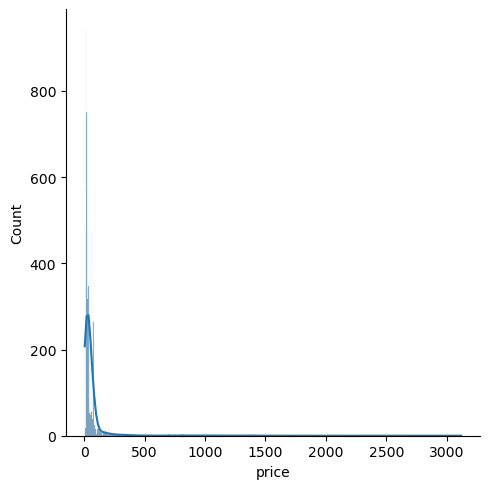

In [46]:
#Scaling and standardization
import seaborn as sns

sns.displot(reviews.price, kde=True)

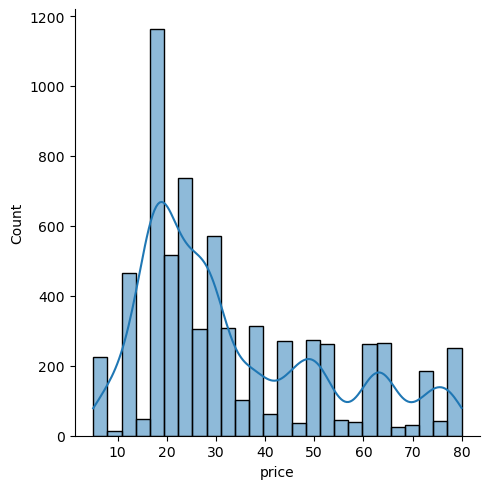

In [47]:
sns.displot(reviews[reviews.price < 80].price, kde=True)

(array([2.50638935, 2.39247216, 2.39678546, ..., 1.88083788, 2.13298867,
        1.9567518 ]),
 -0.3673874553483159)

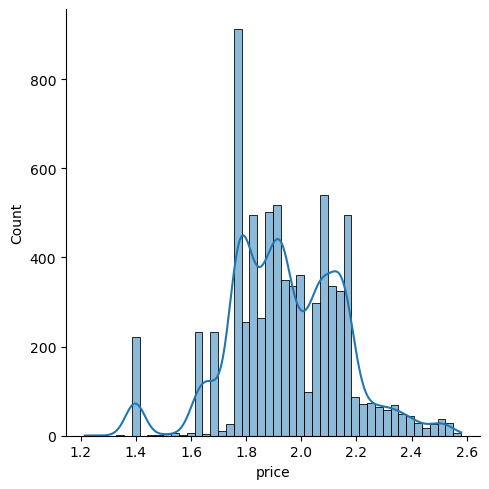

In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats

reviews = pd.read_csv("D:/Python_Projects/Pipeline/wines_SPA.csv")

reviews = reviews.dropna(axis=0, subset=['price']) #delete all nan from the lines (axis=0) in the price column
reviews = reviews.reset_index(drop=True)

sns.displot(pd.Series(stats.boxcox(reviews.price)[0], name='price', index=reviews.index), kde=True)
#boxcox - to take the biased data and transform it to the normal ones, lmbd will be calculated automatically

stats.boxcox(reviews.price)

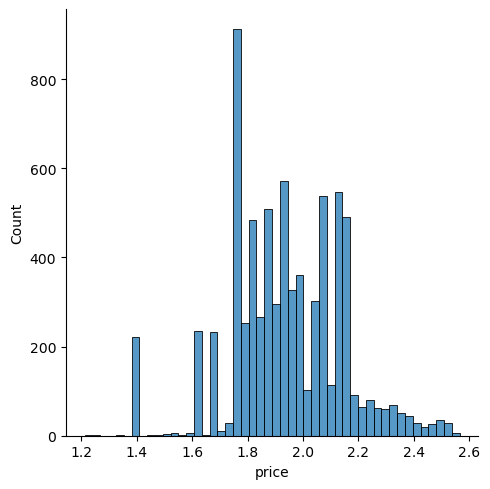

In [3]:
sns.displot((reviews.price.pow(-0.37) - 1 )/-0.37)

In [5]:
reviews['normal_price'] = pd.Series(stats.boxcox(reviews.price, lmbda=-0.37), name='price', index=reviews.index)
reviews.loc[:10, ['normal_price', 'price']]

,normal_price,price
0,2.492517,995.00
1,2.380455,313.50
2,2.384703,324.95
3,2.462412,692.96
4,2.472493,778.06
5,2.429537,490.00
6,2.392994,349.00
7,2.475987,810.89
8,2.391671,345.00
9,2.381023,315.00
